**AI-Powered Emotion Detection from Text**

Emotion is one of the basic instincts of a human being. Emotion detection plays a vital role in the field of textual analysis. At present, people’s expressions and emotional states have turned into the leading topic for research works. Emotion Detection and Recognition from texts are recent fields of research that are closely related to Emotion Analysis. Emotion Analysis aims at detecting and recognizing feelings through the expressions from sentences, such as anger, surprise, joy, fear, sadness, love etc.

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Text Libraries
import nltk
import string
import re

In [2]:
# Feature Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
# Performance Matrix libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
# other
import warnings
warnings.filterwarnings("ignore")


Data Collection

In [6]:
df = pd.read_csv('/content/text_emotions.csv')

In [7]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
Y = df['sentiment']

Dataset size: (20000, 2)
Columns are: Index(['content', 'sentiment'], dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    20000 non-null  object
 1   sentiment  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


<Axes: xlabel='sentiment', ylabel='count'>

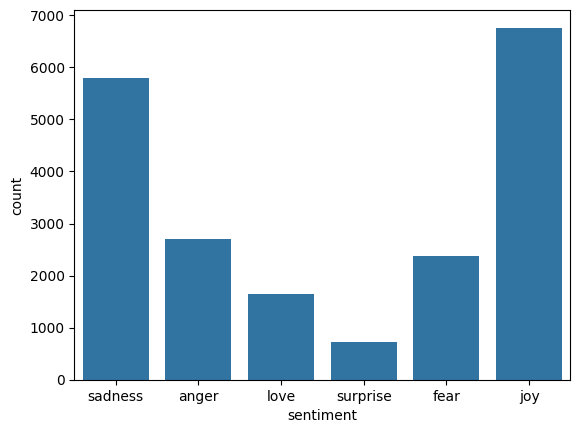

In [9]:
sns.countplot(x = 'sentiment', data = df)

Text Preprocessing

1. Remove punctuations
2. Tokenization - Converting a sentence into list of words
3. Remove stopwords
4. Lammetization/stemming - Tranforming any form of a word to its root word

In [10]:
emojis = pd.read_csv('/content/emojis.txt',sep=',',header=None)
emojis_dict = {i:j for i,j in zip(emojis[0],emojis[1])}
pattern = '|'.join(sorted(re.escape(k) for k in emojis_dict))

def replace_emojis(text):
    text = re.sub(pattern,lambda m: emojis_dict.get(m.group(0)), text, flags=re.IGNORECASE)
    return text

def remove_punct(text):
    text = replace_emojis(text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['content'].apply(lambda x: remove_punct(x))
df.head(10)

,content,sentiment,Tweet_punct
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...
9,i feel romantic too,love,i feel romantic too


In [11]:
def tokenization(text):
    text = text.lower()
    text = re.split('\W+', text)

    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late..."
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]"


In [12]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
              'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','didnt','ive','ate','feel','keep'
                ,'brother','dad','basic','im'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[feeling, little, burdened, lately, wasnt, sure]"
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[taking, milligrams, times, recommended, amoun..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[confused, life, teenager, jaded]"
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[petronas, years, petronas, performed, well, m..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]",[romantic]


In [14]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated],[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feeling, grouchy]"


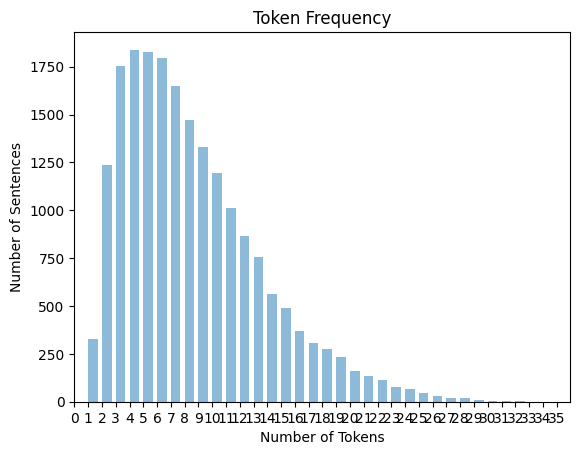

In [15]:
token_lengths = [len(t) for t in df['Tweet_lemmatized']]
plt.hist(token_lengths,bins=33,width = 0.7, fc="green",alpha=0.5)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.title('Token Frequency')
x_Values = [i for i in range(36)]
plt.xticks(x_Values)
plt.xlim(0,36)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [16]:
def clean_text(text):
    text = remove_punct(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

Feature Extraction

○ TF-IDF

[[0.42519636 0.42519636 0.         0.60506143 0.         0.30253071
  0.42519636]
 [0.         0.         0.57615236 0.40993715 0.57615236 0.40993715
  0.        ]]
{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

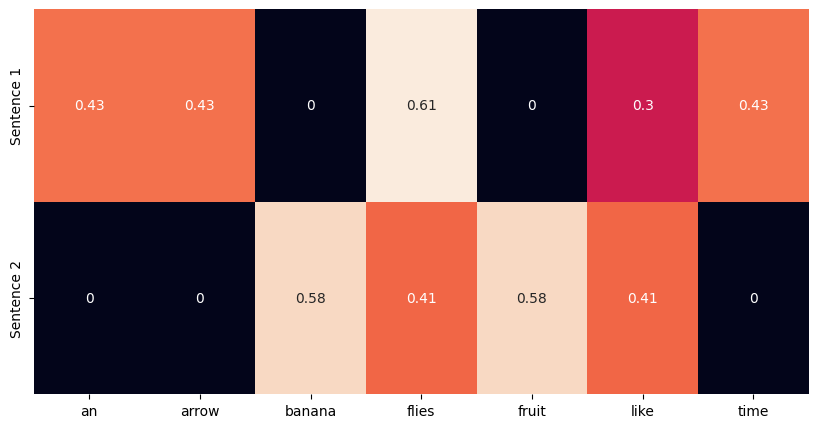

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

document = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(document).toarray()

print (tfidf)

print (tfidf_vectorizer.vocabulary_)

dictionary = sorted(tfidf_vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=dictionary,
                                           yticklabels=['Sentence 1','Sentence 2'])

Vocabulary:  {'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
Encoded Document is:
[[1 1 0 2 0 1 1]
 [0 0 1 1 1 1 0]]
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

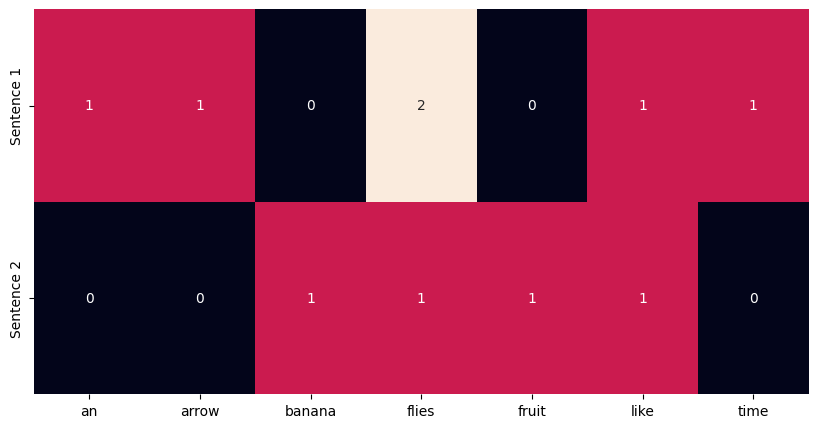

In [21]:
document = ["Time flies flies like an arrow",
            "Fruit flies like a banana"]

# Create a Vectorizer Object
vectorizer = CountVectorizer()

vectorizer.fit(document)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(document)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

dictionary = sorted(vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(vector.toarray(), annot=True, cbar=False, xticklabels=dictionary,
                                             yticklabels=['Sentence 1','Sentence 2'])

[[0.42519636 0.42519636 0.         0.60506143 0.         0.30253071
  0.42519636]
 [0.         0.         0.57615236 0.40993715 0.57615236 0.40993715
  0.        ]]
{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

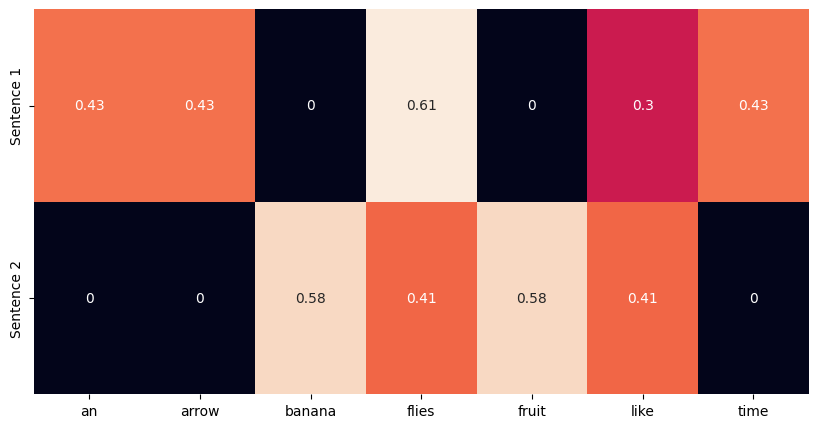

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

document = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(document).toarray()

print (tfidf)

print (tfidf_vectorizer.vocabulary_)

dictionary = sorted(tfidf_vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=dictionary,
                                           yticklabels=['Sentence 1','Sentence 2'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'],test_size=0.3, random_state = 0)

In [24]:
countVectorizer1 = CountVectorizer(analyzer=clean_text)
countVector1 = countVectorizer1.fit_transform(X_train)

countVector2 = countVectorizer1.transform(X_test)

tfidf_transformer_xtrain = TfidfTransformer()
x_train = tfidf_transformer_xtrain.fit_transform(countVector1)

tfidf_transformer_xtest = TfidfTransformer()
x_test = tfidf_transformer_xtest.fit_transform(countVector2)

Models

Logistic Regression

In [25]:
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

y_pred = logisticRegr.predict(x_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_test, y_pred, average='macro')
lr_recal = recall_score(y_test, y_pred, average='macro')
lr_cm = confusion_matrix(y_test,y_pred)
lr_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(lr_acc*100))
print('Precision:', '{0:.3f}'.format(lr_prec*100))
print('Recall:', '{0:.3f}'.format(lr_recal*100))
print('F1-score:', '{0:.3f}'.format(lr_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 86.200
Precision: 87.959
Recall: 76.543
F1-score: 80.762
              precision    recall  f1-score   support

       anger       0.91      0.78      0.84       828
        fear       0.87      0.77      0.82       741
         joy       0.82      0.95      0.88      2019
        love       0.87      0.64      0.73       484
     sadness       0.88      0.94      0.91      1715
    surprise       0.92      0.52      0.66       213

    accuracy                           0.86      6000
   macro avg       0.88      0.77      0.81      6000
weighted avg       0.87      0.86      0.86      6000



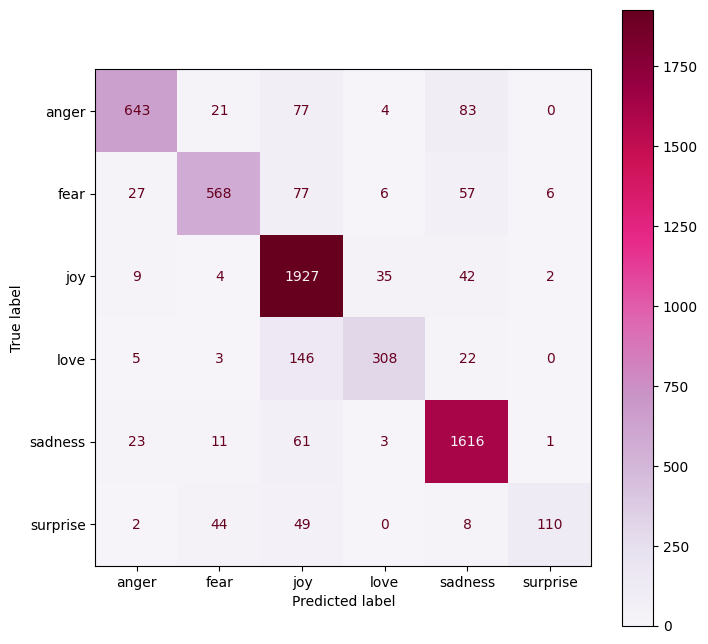

In [26]:
cm_display_lr = ConfusionMatrixDisplay(lr_cm, display_labels=logisticRegr.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_lr.plot(ax=ax,cmap='PuRd')

In [ ]:


# 1. Preprocess X_train and X_test consistently
X_train_cleaned_str = X_train.apply(clean_text).apply(lambda x: ' '.join(x))
X_test_cleaned_str = X_test.apply(clean_text).apply(lambda x: ' '.join(x))

# 2. Initialize and fit CountVectorizer on the preprocessed training data
# We remove max_features here to allow the CountVectorizer to learn the full vocabulary present in X_train_cleaned_str
# This will determine the actual number of features the model will be trained on.
count_vectorizer_pipeline = CountVectorizer()
X_train_counts = count_vectorizer_pipeline.fit_transform(X_train_cleaned_str)
X_test_counts = count_vectorizer_pipeline.transform(X_test_cleaned_str) # Transform test data using fitted vectorizer

# 3. Initialize and fit TfidfTransformer on the training count vectors
tfidf_transformer_pipeline = TfidfTransformer()
x_train_transformed = tfidf_transformer_pipeline.fit_transform(X_train_counts)
x_test_transformed = tfidf_transformer_pipeline.transform(X_test_counts) # Transform test data using fitted transformer

# 4. Re-initialize and re-train the Logistic Regression model with the consistent features
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_transformed, y_train)

# 5. Re-evaluate performance metrics with the newly trained model and consistent test features
y_pred = logisticRegr.predict(x_test_transformed)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_test, y_pred, average='macro')
lr_recal = recall_score(y_test, y_pred, average='macro')
lr_cm = confusion_matrix(y_test,y_pred)
lr_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(lr_acc*100))
print('Precision:', '{0:.3f}'.format(lr_prec*100))
print('Recall:', '{0:.3f}'.format(lr_recal*100))
print('F1-score:', '{0:.3f}'.format(lr_f1*100))
print(classification_report(y_test,y_pred))

# 6. Prediction loop using the consistently fitted pipeline
while True:
    input_str = input("What's in your mind: ")
    if input_str == 'nothing':
        break

    # Preprocess the input string
    cleaned_input_tokens = clean_text(input_str)
    cleaned_input_str = ' '.join(cleaned_input_tokens)

    # Transform the cleaned input string using the *fitted* CountVectorizer and TfidfTransformer
    input_counts = count_vectorizer_pipeline.transform([cleaned_input_str])
    processed_text = tfidf_transformer_pipeline.transform(input_counts)

    print('Emotion using Logistic Regression: ',end = '')
    print(logisticRegr.predict(processed_text))

Accuracy: 86.267
Precision: 88.309
Recall: 76.184
F1-score: 80.543
              precision    recall  f1-score   support

       anger       0.91      0.78      0.84       828
        fear       0.87      0.77      0.82       741
         joy       0.82      0.96      0.89      2019
        love       0.88      0.63      0.73       484
     sadness       0.88      0.94      0.91      1715
    surprise       0.93      0.49      0.64       213

    accuracy                           0.86      6000
   macro avg       0.88      0.76      0.81      6000
weighted avg       0.87      0.86      0.86      6000

What's in your mind: im happy
Emotion using Logistic Regression: ['joy']
What's in your mind: im  feeling ill
Emotion using Logistic Regression: ['sadness']
